# Sommaire des résultats

- Notre code est séparé en 6 parties :

    1. TOP10 des pays ayants le plus de cas confirmés de COVID-19 ainsi que le nombre de personnes qui se sont rétablies et le nombre de morts.
    2. TOP10 des pays ayant des cas confirmés selon la densité de la population
    3. TOP10 des pays ayant des décès élevés selon l'investissement en santé publique
    4. TOP10 des pays ayant des cas confirmés selon la pollution par pays
    5. Nombre de cas confirmés par province au Canada
        - Afin d'avoir une vue locale sur le nombre de cas confirmés à travers le Canada.
    6. Carte du monde démontrant les cas confirmés
        - Afin d'avoir une vue globale sur le nombre de cas confirmés à travers le monde.

__Résultats__: Selon les résultats obtenus en date du `7 avril 2020`, aucune corrélation n'a été trouvé entre le COVID-19 et la densité de la population, l'investissement en santé publique et la pollution. Nous pouvons donc supposer que la propagation de la maladie n'est pas dû aux catégories nommés précédemment.

#### Début de l'exécution du code

In [40]:
# Importation des fichiers nécessaires
import requests 
import pandas
import seaborn 
import matplotlib.pyplot
import numpy
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

# Dans les 3 fichiers principaux ci-dessous, le nombre affiché à chaque jour est le nouveau nombre de cas (ou de décès) 
# par région. À partir du 22 janvier 2020. 

# Lien pour les cas CONFIRMÉS (url1) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

# Lien pour les RÉTABLISSEMENTS (url2) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# Lien pour les DÉCÈS (url3) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

In [11]:
# Variable pour avoir automatiquement la dernière colonne du tableau, soit la dernière journée. 
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")

In [12]:
# Ajout d'un code d'erreur pour voir si le lien fonctionne avant de procéder au code.
# Confirmés
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

try:
    r = requests.get(url1)

except requests.exceptions.RequestException as erreur:
    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url, erreur))

else:
    print(r.status_code)
    
    if r.status_code >= 200 and r.status_code <= 299:
        print("Résultat valide.")
    # Ajout d'erreur pour le serveur, car parfois le serveur de Github ne fonctionne pas.
    elif r.status_code >= 500 and r.status_code <= 599:
        print("Résultat invalide. Erreur dans le serveur, veuillez réessayer plus tard.")
    else:
        print("Résultat invalide.")

200
Résultat valide.


In [13]:
# Soignés
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

try:
    r = requests.get(url2)

except requests.exceptions.RequestException as erreur:
    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url2, erreur))

else:
    print(r.status_code)
    
    if r.status_code >= 200 and r.status_code <= 299:
        print("Résultat valide.")
    # Ajout d'erreur pour le serveur, car parfois le serveur de Github ne fonctionne pas.
    elif r.status_code >= 500 and r.status_code <= 599:
        print("Résultat invalide. Erreur dans le serveur, veuillez réessayer plus tard.")
    else:
        print("Résultat invalide.")

200
Résultat valide.


In [14]:
# Décès
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

try:
    r = requests.get(url3)

except requests.exceptions.RequestException as erreur:
    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url3, erreur))

else:
    print(r.status_code)
    
    if r.status_code >= 200 and r.status_code <= 299:
        print("Résultat valide.")
    # Ajout d'erreur pour le serveur, car parfois le serveur de Github ne fonctionne pas.
    elif r.status_code >= 500 and r.status_code <= 599:
        print("Résultat invalide. Erreur dans le serveur, veuillez réessayer plus tard.")
    else:
        print("Résultat invalide.")

200
Résultat valide.


In [15]:
# Importer les fichiers confirmés, rétablis et morts
# datac = données cas confirmés
# datar = données cas rétablis
# datad = données cas décédés
rawdatac = pandas.read_csv(url1).fillna('N.D')
rawdatar = pandas.read_csv(url2).fillna('N.D')
rawdatad = pandas.read_csv(url3).fillna('N.D')

# 1. TOP10 des pays ayants le plus de cas confirmés de COVID-19 ainsi que le nombre de personnes qui se sont rétablies et le nombre de morts.

In [17]:
# Top 20 des pays avec le plus de cas confirmés
datac_group_1 = rawdatac.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datac_group_sorted_1 = datac_group_1.sort_values(by=hier, ascending = False)
datac_sorted_top_1 = datac_group_sorted_1.head(20)

# Renommer la colonne de hier
datac_final_1 = datac_sorted_top_1.rename(columns= {hier: 'Confirmed'})
datac_final_1.reset_index()

,Country/Region,Province/State,Confirmed
0,US,N.D,366667
1,Spain,N.D,136675
2,Italy,N.D,132547
3,Germany,N.D,103374
4,France,N.D,98010
5,China,Hubei,67803
6,Iran,N.D,60500
7,United Kingdom,N.D,51608
8,Turkey,N.D,30217
9,Switzerland,N.D,21657


In [18]:
# Top 20 des pays ayant le plus de cas soignés
datar_group_1 = rawdatar.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datar_group_sorted_1 = datar_group_1.sort_values(by=hier, ascending = False)
datar_group_top_1 = datar_group_sorted_1.head(20)

# Renommer la colonne de hier
datar_final_1 = datar_group_top_1.rename(columns= {hier: 'Recovered'})
datar_final_1

,,Recovered
Country/Region,Province/State,
China,Hubei,64014
Spain,N.D,40437
Germany,N.D,28700
Iran,N.D,24236
Italy,N.D,22837
US,N.D,19581
France,N.D,17250
Switzerland,N.D,8056
"Korea, South",N.D,6598


In [20]:
# Top 20 des pays ayant subit le plus de décès
datad_group_1 = rawdatad.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datad_group_sorted_1 = datad_group_1.sort_values(by=hier, ascending = False)
datad_group_top_1 = datad_group_sorted_1.head(20)

# Renommer la colonne de hier
datad_final_1 = datad_group_top_1.rename(columns= {hier: 'Deaths'})
datad_final_1

,,Deaths
Country/Region,Province/State,
Italy,N.D,16523
Spain,N.D,13341
US,N.D,10783
France,N.D,8911
United Kingdom,N.D,5373
Iran,N.D,3739
China,Hubei,3212
Netherlands,N.D,1867
Germany,N.D,1810


In [22]:
# Renommer les colonnes avec la date d'hier selon le type de cas observé
rawdatac_group = rawdatac.groupby(['Country/Region'])[[hier]].sum()
df_confirmed = rawdatac_group.rename(columns={hier:'Confirmed'})
df_confirmed1 = df_confirmed.reset_index()

rawdatad_group = rawdatad.groupby(['Country/Region'])[[hier]].sum()
df_deaths = rawdatad_group.rename(columns={hier:'Deaths'})
df_deaths1 = df_deaths.reset_index()

rawdatar_group = rawdatar.groupby(['Country/Region'])[[hier]].sum()
df_recovered = rawdatar_group.rename(columns={hier:'Recovered'})
df_recovered1 = df_recovered.reset_index()

# Jointures
# Jointure entre les données non filtrées de cas confirmés et nombre de morts
df_confirmed_deaths = df_confirmed1.join(df_deaths1.set_index('Country/Region'), on='Country/Region')

# Jointure entre les données non filtrées de cas guéris et la jointure précédemment créée
df_confirmed_deaths_recovered = df_confirmed_deaths.join(df_recovered1.set_index('Country/Region'), on='Country/Region')

# TOP 10 des pays
df_final_10 = df_confirmed_deaths_recovered.nlargest(10,columns='Confirmed')
df_final_10

,Country/Region,Confirmed,Deaths,Recovered
171,US,366667,10783,19581
156,Spain,136675,13341,40437
84,Italy,132547,16523,22837
65,Germany,103374,1810,28700
61,France,98963,8926,17428
36,China,82665,3335,77310
80,Iran,60500,3739,24236
175,United Kingdom,52279,5385,287
170,Turkey,30217,649,1326
161,Switzerland,21657,765,8056


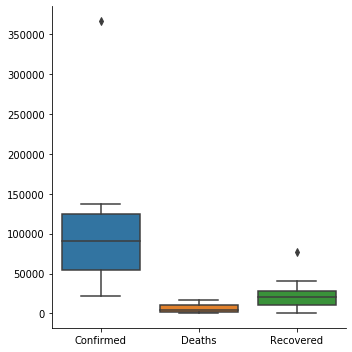

In [24]:
# Box and whiskers diagramme du top 20 des cas confirmés ainsi que leurs morts et cas soignés correspondants
import seaborn

seaborn.catplot(kind='box', data=df_final_10, orient="v")

In [25]:
# Petit texte qui mentionne les totaux pour chacun des types de cas observés
df_sum = df_confirmed_deaths_recovered.drop(columns='Country/Region')
df_sum_final = df_sum.sum()
print("En date du {0}:\n\n{1}".format(hier,df_sum_final))

En date du 4/6/20:

Confirmed    1345101
Deaths         74565
Recovered     276515
dtype: int64


# 2. TOP10 des pays ayant des cas confirmés selon la densité de la population

In [33]:
# Remplacer certains noms dans les 3 fichiers principaux afin d'être capable de faire des jointures avec
# les fichiers du World Data Bank

# cas confirmés
datac_replace = rawdatac.replace("US","United States").replace("Iran","Iran, Islamic Rep.")

# cas décédés
datad_replace = rawdatad.replace("US","United States").replace("Iran","Iran, Islamic Rep.")

In [35]:
# Faire la somme de cas par pays (et non pas par région) et changer le nom de la colonne d'hier
datac_group_2 = datac_replace.groupby(["Country/Region"])[[hier]].sum()
datac_group_renamed = datac_group_2.rename(columns={hier:'Confirmed'})

# Faire le top 10 des cas par pays. La date d'hier étant les cas confirmés. 
datac_group_sorted_2 = datac_group_renamed.sort_values(by=['Confirmed'],ascending=False).head(10)
datac_group_sorted_2

,Confirmed
Country/Region,
United States,366667
Spain,136675
Italy,132547
Germany,103374
France,98963
China,82665
"Iran, Islamic Rep.",60500
United Kingdom,52279
Turkey,30217


In [38]:
# Importer le fichier csv de la World Bank (Pop = population). 
Pop = pandas.read_csv("Data_Pop.csv",delimiter=',', skiprows=4).fillna('N.D.')

# Jointure entre les deux fichiers selon le pays et ensuite trier le fichier selon la date
data_full_2 = datac_group_sorted_2.join(Pop.set_index("Country Name"), on="Country/Region")

datac_final_2 = data_full_2.sort_values(by=['Confirmed'],ascending=False).head(10)
datac_final_2.reset_index()

,Country/Region,Confirmed,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,United States,366667,USA,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,20.06,20.37,20.66,20.95,...,34.06,34.31,34.55,34.81,35.06,35.32,35.55,35.77,N.D.,N.D.
1,Spain,136675,ESP,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,61.51,62.07,62.62,63.25,...,93.51,93.51,93.20,92.92,92.95,93.05,93.27,93.53,N.D.,N.D.
2,Italy,132547,ITA,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,171.83,172.99,174.26,175.70,...,201.87,202.42,204.78,206.67,206.47,206.12,205.81,205.45,N.D.,N.D.
3,Germany,103374,DEU,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,210.17,212.03,214.00,215.73,...,230.30,230.75,231.16,232.11,234.15,235.71,236.60,237.37,N.D.,N.D.
4,France,98963,FRA,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,86.27,87.49,88.72,89.91,...,119.34,119.91,120.53,121.11,121.62,122.11,122.12,122.34,N.D.,N.D.
5,China,82665,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,70.34,70.92,72.68,74.39,...,143.17,143.87,144.58,145.32,146.06,146.85,147.67,148.35,N.D.,N.D.
6,"Iran, Islamic Rep.",60500,IRN,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,13.80,14.16,14.54,14.92,...,45.82,46.38,46.96,47.56,48.19,48.85,49.53,50.22,N.D.,N.D.
7,United Kingdom,52279,GBR,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,218.24,220.10,221.76,223.21,...,261.48,263.30,265.07,267.07,269.21,271.13,273.05,274.83,N.D.,N.D.
8,Turkey,30217,TUR,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,36.57,37.46,38.37,39.30,...,95.43,97.00,98.66,100.35,102.04,103.71,105.38,106.96,N.D.,N.D.
9,Switzerland,21657,CHE,Population density (people per sq. km of land ...,EN.POP.DNST,N.D.,137.48,141.01,144.06,146.46,...,200.23,202.37,204.71,207.22,209.60,211.90,213.88,215.52,N.D.,N.D.


Text(0, 0.5, 'Habitants/km2')

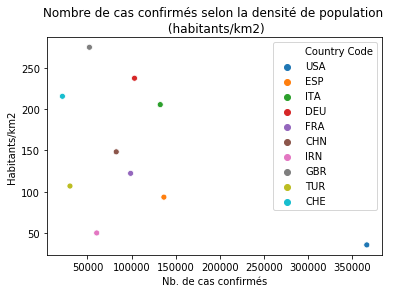

In [41]:
# y = 2018, car c'est l'année la plus récente où nous avons le PIB de chaque pays du top 10. 
seaborn.scatterplot(x='Confirmed', y='2018', hue='Country Code', data= datac_final_2)
matplotlib.pyplot.title("Nombre de cas confirmés selon la densité de population \n (habitants/km2)")
matplotlib.pyplot.xlabel("Nb. de cas confirmés")
matplotlib.pyplot.ylabel("Habitants/km2")

# 3. TOP10 des pays ayant des décès élevés selon l'investissement en santé publique

In [44]:
# Faire la somme de décès par pays (et non pas par région)
datad_group_3 = datad_replace.groupby(["Country/Region"])[[hier]].sum()
datad_group_renamed = datad_group_3.rename(columns={hier:'Confirmed'})

# Faire le top 10 des décès par pays. 
datad_group_sorted_3 = datad_group_renamed.sort_values(by=['Confirmed'],ascending=False).head(10)
datad_group_sorted_3

,Confirmed
Country/Region,
Italy,16523
Spain,13341
United States,10783
France,8926
United Kingdom,5385
"Iran, Islamic Rep.",3739
China,3335
Netherlands,1874
Germany,1810


In [45]:
# Importer le fichier csv de la World Bank. 
GDP = pandas.read_csv("Data_H.csv",delimiter=',', skiprows=4).fillna('N.D')

# Faire le joint entre les deux fichiers selon le pays et ensuite trier le fichier selon la date
datad_full_3 = datad_group_sorted_3.join(GDP.set_index("Country Name"), on="Country/Region")
datad_final_3 = datad_full_3.sort_values(by=['Confirmed'],ascending=False).head(10)
datad_final_3.reset_index()

,Country/Region,Confirmed,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Italy,16523,ITA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,8.83,8.96,8.95,9.01,8.99,8.94,N.D,N.D,N.D,N.D
1,Spain,13341,ESP,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,9.09,9.08,9.03,9.02,9.12,8.97,N.D,N.D,N.D,N.D
2,United States,10783,USA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,16.37,16.37,16.33,16.51,16.82,17.07,N.D,N.D,N.D,N.D
3,France,8926,FRA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,11.19,11.32,11.44,11.60,11.50,11.54,N.D,N.D,N.D,N.D
4,United Kingdom,5385,GBR,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,8.42,8.34,9.77,9.72,9.79,9.76,N.D,N.D,N.D,N.D
5,"Iran, Islamic Rep.",3739,IRN,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,6.61,6.64,5.99,6.91,7.76,8.10,N.D,N.D,N.D,N.D
6,China,3335,CHN,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,4.33,4.55,4.71,4.77,4.89,4.98,N.D,N.D,N.D,N.D
7,Netherlands,1874,NLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,10.52,10.90,10.90,10.86,10.39,10.36,N.D,N.D,N.D,N.D
8,Germany,1810,DEU,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,10.72,10.77,10.92,10.96,11.08,11.14,N.D,N.D,N.D,N.D
9,Belgium,1632,BEL,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,N.D,N.D,N.D,N.D,N.D,...,10.00,10.11,10.27,10.34,10.11,10.04,N.D,N.D,N.D,N.D


Text(0, 0.5, '% du PIB')

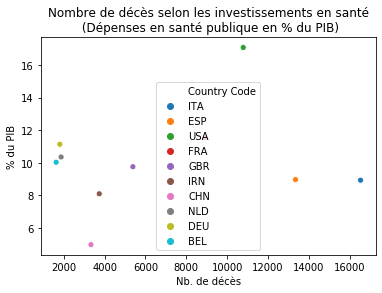

In [46]:
# y = 2016, car c'est l'année la plus récente où nous avons le PIB de chaque pays du top 10. 
graph = seaborn.scatterplot(x='Confirmed', y='2016', hue='Country Code', data= datad_final_3)
matplotlib.pyplot.title("Nombre de décès selon les investissements en santé\n (Dépenses en santé publique en % du PIB)")
matplotlib.pyplot.xlabel("Nb. de décès")
matplotlib.pyplot.ylabel("% du PIB")

# 4. TOP10 des pays ayant des cas confirmés selon la pollution par pays

In [47]:
# Faire la somme de cas par pays (et non pas par région)
datac_group_4 = datac_replace.groupby(["Country/Region"])[[hier]].sum()
datac_group_renamed_4 = datac_group_4.rename(columns={hier:'Confirmed'})

# Nouveau tableau
datac_new = datac_group_renamed_4.reset_index()
datac_new

,Country/Region,Confirmed
0,Afghanistan,367
1,Albania,377
2,Algeria,1423
3,Andorra,525
4,Angola,16
...,...,...
179,Vietnam,245
180,West Bank and Gaza,254
181,Western Sahara,4
182,Zambia,39


In [49]:
# Importer le fichier csv de la World Bank (Pop = population).
data_air = pandas.read_csv('Data_Air.csv', sep=';').fillna('N.D.')

# Changer les données afin de pouvoir les mettre en ordre décroissant
data_air['2017'] = pandas.to_numeric(data_air['2017'], errors='coerce')

# Faire le joint entre les deux fichiers selon le pays et ensuite trier le fichier selon la date
datac_full = data_air.join(datac_new.set_index('Country/Region'), on='Country/Region')
datac_full_iloc = datac_full.iloc[:,[0,-2,-1]]
datac_values = datac_full_iloc.sort_values(by=['Confirmed'], ascending=False).head(10)

# Renommer la colonne '2017' et trier selon le taux de pollution
datac_renamed = datac_values.rename(columns={'2017':'Indice de pollution'})
datac_final_4 = datac_renamed.sort_values(by=['Indice de pollution'])
datac_final_4

,Country/Region,Indice de pollution,Confirmed
206,United States,7.40,366667.00
179,Spain,9.70,136675.00
188,Switzerland,10.30,21657.00
205,United Kingdom,10.50,52279.00
68,France,11.80,98963.00
73,Germany,12.00,103374.00
96,Italy,16.80,132547.00
91,"Iran, Islamic Rep.",39.00,60500.00
198,Turkey,44.30,30217.00
41,China,52.70,82665.00


Text(0, 0.5, 'Nb. de cas confirmés')

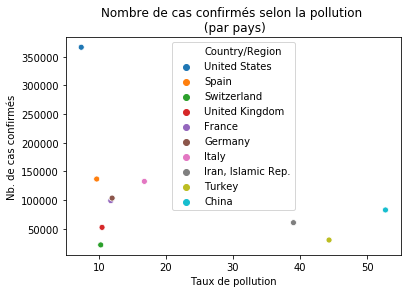

In [50]:
# y = 2017, car c'est l'année la plus récente où nous avons le taux de pollution de chaque pays du top 10. 
seaborn.scatterplot(x='Indice de pollution', y='Confirmed', hue='Country/Region', data= datac_final_4)
matplotlib.pyplot.title("Nombre de cas confirmés selon la pollution \n (par pays)")
matplotlib.pyplot.xlabel("Taux de pollution")
matplotlib.pyplot.ylabel("Nb. de cas confirmés")

# 5. Nombre de cas confirmés par province au Canada

In [51]:
# Faire un tableau du nb de cas au canada par région/province (Province/State)
datac_canada = rawdatac[rawdatac["Country/Region"] == "Canada"]

# Retirer les bâteaux de croisières et trier selon la date la plus à jour
datac_canada_drop = datac_canada.drop([231,238,37])
datac_final_5 = datac_canada_drop.sort_values(by=[hier],ascending=False)
datac_final_5

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
44,Quebec,Canada,52.94,-73.55,0,0,0,0,0,0,...,2498,2840,3430,4162,4611,5518,6101,6101,7944,8580
42,Ontario,Canada,51.25,-85.32,0,0,0,0,1,1,...,1144,1355,1706,1966,2392,2793,3255,3630,4354,4347
36,British Columbia,Canada,49.28,-123.12,0,0,0,0,0,0,...,884,884,970,1013,1013,1121,1174,1203,1203,1266
35,Alberta,Canada,53.93,-116.58,0,0,0,0,0,0,...,542,621,661,690,754,969,969,1075,1181,1250
41,Nova Scotia,Canada,44.68,-63.74,0,0,0,0,0,0,...,110,122,127,147,173,193,207,236,262,293
45,Saskatchewan,Canada,52.94,-106.45,0,0,0,0,0,0,...,134,156,156,184,193,206,220,220,249,249
40,Newfoundland and Labrador,Canada,53.14,-57.66,0,0,0,0,0,0,...,120,135,148,152,175,183,195,195,217,226
38,Manitoba,Canada,53.76,-98.81,0,0,0,0,0,0,...,64,72,96,103,127,167,182,182,203,203
39,New Brunswick,Canada,46.57,-66.46,0,0,0,0,0,0,...,51,66,68,70,81,91,91,91,98,103
43,Prince Edward Island,Canada,46.51,-63.42,0,0,0,0,0,0,...,11,11,18,21,21,22,22,22,22,22


Text(0.5, 0, 'Province')

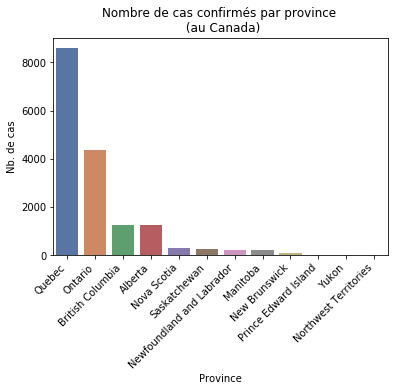

In [52]:
# Graphique nombre de cas par Province 
graph = seaborn.barplot(x="Province/State", y=hier, palette="deep", data=datac_final_5)

graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
matplotlib.pyplot.title("Nombre de cas confirmés par province \n (au Canada)")
matplotlib.pyplot.ylabel("Nb. de cas")
matplotlib.pyplot.xlabel("Province")

# 6. Carte du monde démontrant les cas confirmés

In [53]:
# Importer les formules nécessaires
from contextlib import closing
import csv
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline 

# Définition des variables et listes requises
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_list = []
lons = []
lats = []
texts = []

# Ajout d'un code d'erreur à part au cas où le lien ne fonctionne pas
try:
    r = requests.get(url)

except requests.exceptions.RequestException as erreur:
    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url, erreur))

else:
    print(r.status_code)
    
    if r.status_code >= 200 and r.status_code <= 299:
              
            # Pour pouvoir lire le url en fichier csv sans utiliser les pandas
        with closing(requests.get(url, stream=True)) as r:
            f = (line.decode('utf-8') for line in r.iter_lines())
            reader = csv.reader(f, delimiter=',', quotechar='"')
            for x in reader:
                
                # le [-1] nous permet d'obtenir les données les plus à jour (la dernière date enregistrée)
                confirmed = x[-1]
                lon = x[3]
                lat = x[2]
                title = x[1]
                provinces = x[0]

                # Append chaque item à la liste correspondante
                confirmed_list.append(confirmed)
                lons.append(lon)
                lats.append(lat)
                texts.append(provinces+ '\n' + title + '\n' + confirmed)
                
                # Pour convertir les items de la liste en int
                liste = [ int(y) for y in confirmed_list[1:]]

        # Préparation du graphique
        graph_data = [{
            'type': 'scattergeo',
            'lon': lons[1:],
            'lat': lats[1:],
            'text': texts[1:],
            'marker': {
                'size': 2*int(confirmed),
                'color': liste,
                'colorscale': 'jet', 
                'colorbar': {'title': 'Nombre de cas'},
            },
        }]
        
        # Titre du graphique
        graph_layout = Layout(title='Cas Confirmés - COVID-19')

        # Génération du graphique, comme fichier externe 'covid_csv.html'
        fig = {'data': graph_data, 'layout': graph_layout}

        offline.plot(fig, filename='covid_csv.html')  
    else:
        print("résultat invalide")

200
